In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1 = np.loadtxt("TAUXcurl.out")
data2 = np.loadtxt("TAUYcurl.out")

In [3]:
data1.shape

(5711,)

In [4]:
data2.shape

(5711,)

In [10]:
#fin = data1-data2
fin = data1

In [11]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

In [12]:
wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

In [13]:
wspxx

array([ 312.,  324.,  444.,  456.,  468.,  756.,  768.,  780.,  804.,
       1032., 1044., 1056., 1068., 1080., 1092., 1104., 1116., 1128.,
       1344., 1392., 1404., 1416., 1428., 1440., 1452., 1464., 1476.,
       1488., 1500., 1512., 1524., 1536., 1548., 1560., 1572., 1584.,
       1596., 1608., 1620., 1632., 1644., 1656., 1848., 1860., 1872.,
       1884., 1896., 1908., 1920., 1944., 1956., 1968., 1980., 1992.,
       2400., 2412., 2424., 2436., 2448., 2460., 2472., 2484., 2496.,
       2508., 2520., 2748., 2760., 2772., 2784., 2796., 2808., 2820.,
       2832., 2844., 2928., 2940., 2952., 2964., 3084., 3096., 3108.,
       3120., 3132., 3144., 3348., 3360., 3372., 3384., 3396., 3408.,
       3420., 3432., 3444., 3492., 3504., 3996., 4008., 4020., 4032.,
       4044., 4056., 4068., 4080., 4092., 4104., 4116.])

NameError: name 'noxxx' is not defined

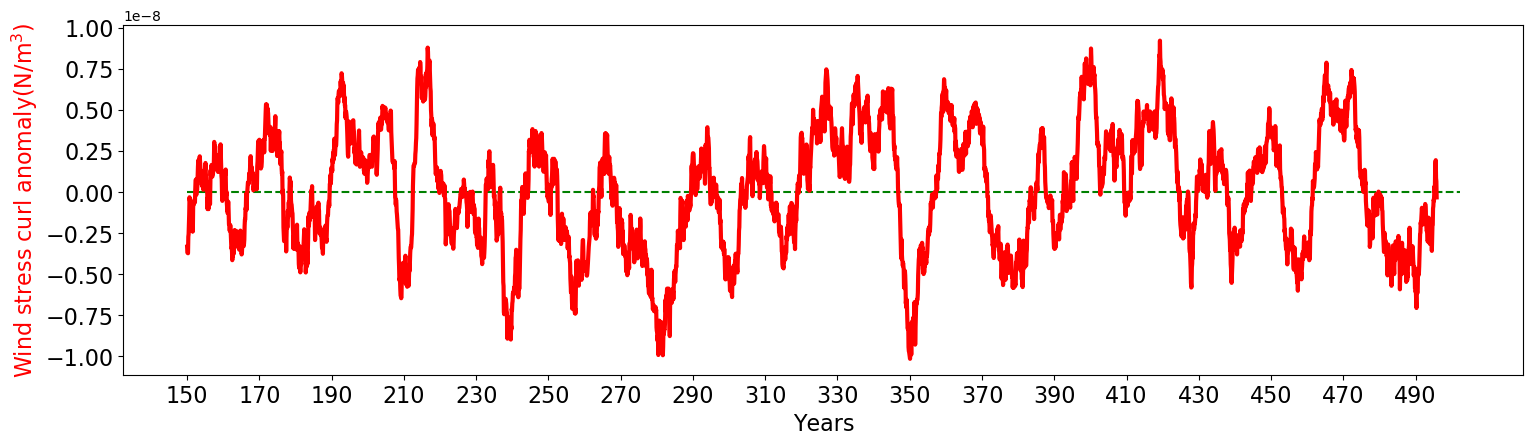

In [14]:
t = np.arange(0,4227,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(0.001*fin[1560:],'r',linewidth=3)
plt.hlines(0, 0, 4227, colors = "g",linestyles = "dashed")
#plt.vlines(mrpxx, -100, 100, colors = "grey")
#plt.vlines(wspxx, -100, 100, colors = "r")
#plt.xticks(range(0,5777,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420','440','460','480','500'],**my_font)
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'r',**my_font)
plt.axis("tight")
plt.vlines(noxxx, -100, 100, colors = "grey")
plt.vlines(mrpxxx, -100, 100, colors = "blue")
plt.vlines(xxx, -100, 100, colors = "yellow")
plt.hlines(0, 0, 4227, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.000000011, 0.000000011),xlim=(0, 4170))
ax0.set_title('Averaged (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S), whole',**my_font)
plt.savefig("windcurlwhole.png",bbox_inches='tight',dpi=fig.dpi)

In [10]:
fin[1560:].shape

(4151,)

In [11]:
#np.savetxt('curl.out',fin[1560:])

In [12]:
cc= fin[1569::12]

In [77]:
#np.savetxt('niu.out',cc)

In [13]:
list_before = wspxx
list_after = [val for val in list_before for i in range(12)]

In [14]:
xxx = np.reshape(list_after,(106,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [15]:
list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]

In [16]:
1608/12

134.0

In [17]:
mrpxxx = np.reshape(list_after,(216,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [18]:
list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(134,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [19]:
1404/12

117.0

In [20]:
ave = np.nanmean(fin)

In [21]:
ave

6.207916484026614e-21

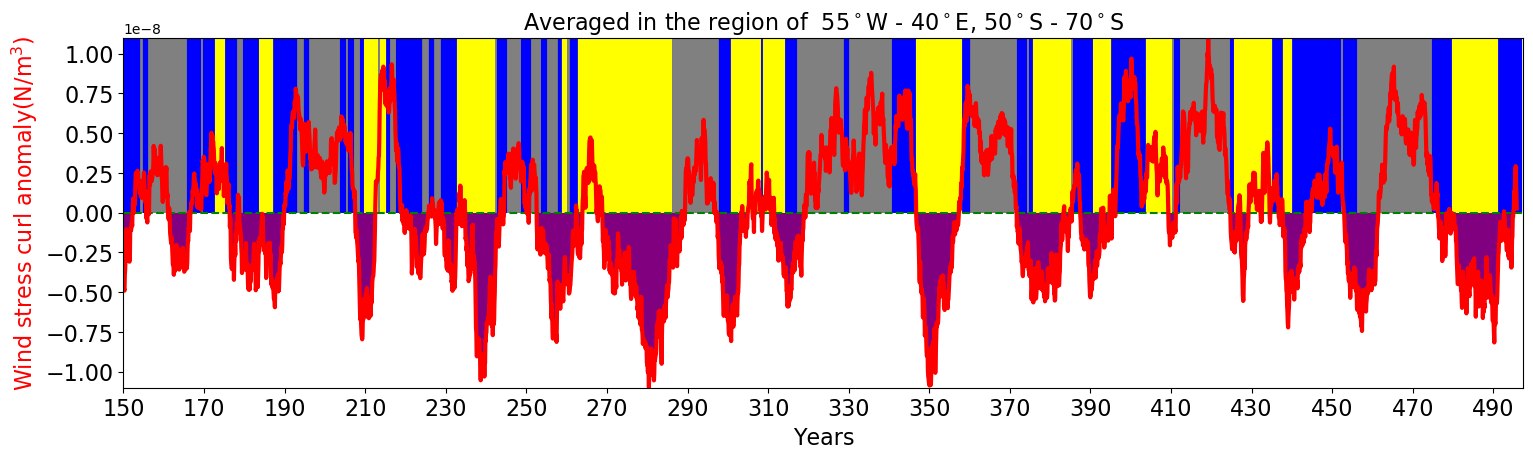

In [22]:
t = np.arange(0,4151,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(t,0.001*fin[1560:],'r',linewidth=3)
#plt.hlines(ave, 0, 4227, colors = "g",linestyles = "dashed")
ax0.fill_between(t,0,0.001*fin[1560:],where=0.001*fin[1560:]<0,facecolor='purple', alpha=1)
#plt.vlines(mrpxx, -100, 100, colors = "grey")
#plt.vlines(wspxx, -100, 100, colors = "r")
#plt.xticks(range(0,5777,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320','340', '360', '380','400','420','440','460','480','500'],**my_font)
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'r',**my_font)
plt.axis("tight")
plt.vlines(noxxx, 0, 100, colors = "grey")
plt.vlines(mrpxxx, 0, 100, colors = "blue")
plt.vlines(xxx, 0, 100, colors = "yellow")
plt.hlines(0, 0, 4227, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.000000011, 0.000000011),xlim=(0, 4170))
ax0.set_title('Averaged in the region of  55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S',**my_font)
plt.savefig("windcurlwhole.png",bbox_inches='tight',dpi=fig.dpi)

In [17]:
uppxx = np.loadtxt("uppxx.out")
uppxx = uppxx*12

In [18]:
list_before = uppxx
list_after = [val for val in list_before for i in range(12)]
xxxup = np.reshape(list_after,(125,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [19]:
upmean1 = np.loadtxt("upmean.out")

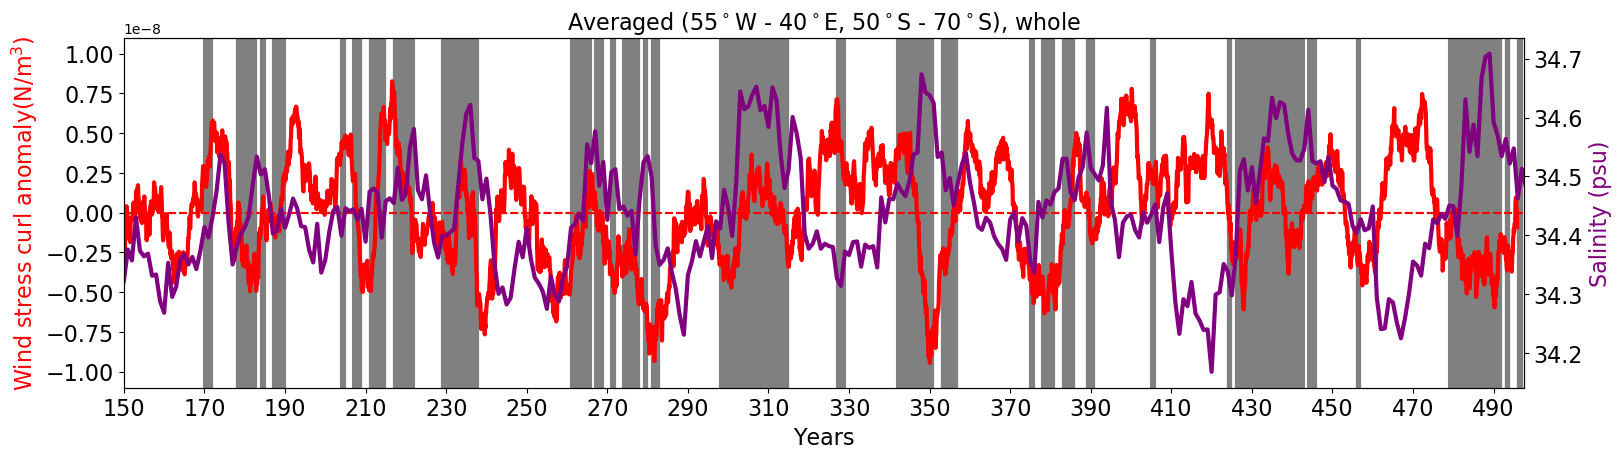

In [23]:
t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(0.001*fin[1560:],'red',linewidth=3)
plt.vlines(xxxup, -100,100,colors = "grey")
plt.hlines(0, 0, 4227, colors = "red",linestyles = "dashed")

plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'red',**my_font)
plt.axis("tight")
plt.vlines(xxxup, 55, 92, colors = "grey")
plt.hlines(0, 0, 4227, colors = "red",linestyles = "dashed")
ax0.set(ylim=(-0.000000011, 0.000000011),xlim=(0, 4170))

ax2 = ax0.twinx() 
ax2.plot(t,upmean1,'purple',linewidth=3)
#ax2.plot(t[:346],temm,'blue',linewidth=2)
plt.yticks(**my_font)
plt.ylabel('Salinity (psu)',color= 'purple',**my_font)

ax0.set_title('Averaged (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S), whole',**my_font)
plt.savefig("witry.png",bbox_inches='tight',dpi=fig.dpi)